In [4]:
import os

path = '/Users/jorgecamero/MOIRE-FRAUD-DETECTION'
print(os.path.exists(path))

for roots, dirs, files in os.walk(path):
    for file in files:
        if not file.endswith(('.jpg', '.png', '.jpeg', '.zip', '.txt', '.json', '.keras', '.py', '.pyc', '.ipynb', '.gitignore', '.gitattributes')):
            path = os.path.join(roots, file)
            if '.git' not in path:
                print(os.path.join(roots, file))
                #os.remove(os.path.join(roots, file))

True


In [5]:
import os

path = 'batch/Ataque'
img_list = [file for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

for idx, file in enumerate(img_list):
    filename = '_'.join(file.split('_')[3::])
    filename = f'{idx}_{filename}'
    print(os.path.join(path, filename))
    os.rename(os.path.join(path, file), os.path.join(path, filename))

FileNotFoundError: [Errno 2] No such file or directory: 'batch/Ataque'

In [6]:
import os
import shutil
from IPython.display import clear_output
import matplotlib.pyplot as plt

from utils import get_model, load_img, preprocess_img
from predict import predict_img
from read_json import get_scores

HEIGHT = 200
WIDTH = 350
model_path = '/Users/jorgecamero/Downloads/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

path = '/Users/jorgecamero/MoireDataset/batch/Ataque'
img_list = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

cnt = 0
for idx, img_path in enumerate(img_list):
    img = load_img(img_path, width=WIDTH, height=HEIGHT)
    img_elements = preprocess_img(img)
    prediction_bin, prediction = predict_img(model, img_elements)
    
    if not prediction_bin:
        filename = os.path.basename(img_path)
        #output_path = os.path.join(outputDir, filename)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
        print(prediction)
        plt.draw()
        plt.pause(0.5)
        clear_output(wait=True)
        #shutil.move(img_path, output_path)
    else:
        cnt += 1
        print(f'Contador de aciertos: {cnt}/{len(img_list)}', end='\r')
        
print(f"Porcentaje de aciertos: {cnt}/{len(img_list)} - {round(cnt/len(img_list), 2)*100}%")

I0000 00:00:1730134381.404256  260816 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730134381.419956  264521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 100, 175, 1), found shape=(1, 200, 350)

In [7]:
import os
import random
import matplotlib.pyplot as plt

from utils import get_model
from predict import predict_img
from utils import load_img, preprocess_img

model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

Ataque
1.0


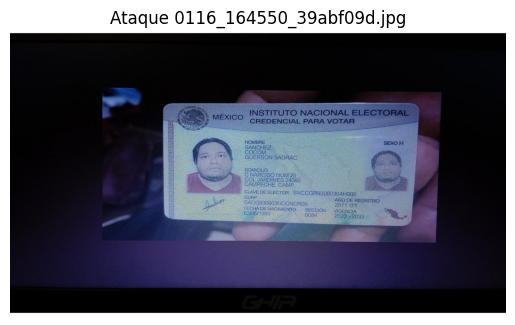

In [8]:
HEIGHT = 100
WIDTH = 175

path = '/Users/jorgecamero/MoireDataset/batchTrain'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
img_elements = preprocess_img(img, height=HEIGHT, width=WIDTH)
prediction_bin, prediction = predict_img(model, img_elements)
prediction_label = 'Ataque' if prediction_bin == 1 else 'Real'

plt.imshow(load_img(random_img, width=1400, height=800))
plt.title(f'{os.path.basename(random_folder)} {os.path.basename(random_img)}')
plt.axis('off')
print(prediction_label)
print(prediction)

# num_cols = 4
# num_rows = (len(img_elements) + num_cols - 1) // num_cols

# plt.figure(figsize=(12, 2 * num_rows))

# for idx, (name, element) in enumerate(img_elements.items()):
#     plt.subplot(num_rows, num_cols, idx + 1)
#     plt.imshow(element)
#     plt.axis('on')
#     plt.title(name)

# plt.tight_layout()
# plt.show()

0
1
1
Predictions: Ataque
Atack_conf: 66.70%


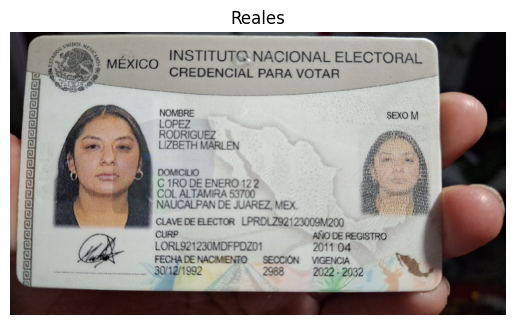

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

atack_cnt = 0

path = '/Users/jorgecamero/MoireDataset/batch'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
img_elements = preprocess_img(img, height=HEIGHT, width=WIDTH)
prediction_bin, prediction = predict_img(model, img_elements)
atack_cnt = atack_cnt + 1 if prediction_bin == 1 else atack_cnt
print(prediction_bin)

# Procesar la imagen girada 180°
img_rotated_180 = tf.image.rot90(img, k=2)
img_rotated_180_elements = preprocess_img(img_rotated_180, height=HEIGHT, width=WIDTH)
prediction_bin, prediction = predict_img(model, img_rotated_180_elements)
atack_cnt = atack_cnt + 1 if prediction_bin == 1 else atack_cnt
print(prediction_bin)


# Procesar la imagen girada 180° con giro vertical
img_rotated_180_flipped = tf.image.flip_up_down(img_rotated_180)
img_rotated_180_flipped_elements = preprocess_img(img_rotated_180_flipped, height=HEIGHT, width=WIDTH)
prediction_bin, prediction = predict_img(model, img_rotated_180_flipped_elements)
atack_cnt = atack_cnt + 1 if prediction_bin == 1 else atack_cnt
print(prediction_bin)

prediction_label = 'Real' if atack_cnt < 2 else 'Ataque'
print(f"Predictions: {prediction_label}")
print(f"Atack_conf: {100*round(atack_cnt/3, 3):.2f}%")

plt.imshow(load_img(random_img, width=1400, height=800))
plt.title(f'{os.path.basename(random_folder)}')
plt.axis('off')
plt.show()

In [1]:
import os
import cv2
import random
import warnings
import mediapipe as mp
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.4)

I0000 00:00:1729201603.855359  176640 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [1]:
from utils import get_model

model = get_model(loadFlag=True, path='/Users/jorgecamero/Downloads/best_model.keras')

I0000 00:00:1730135192.256828  270714 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730135192.259872  270889 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/jorgecamero/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/trainers/trainer.py:210: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from utils import load_img, preprocess_img, preprocess_augmentation_img
from predict import predict_img

HEIGHT = 100
WIDTH = 175

Ataque


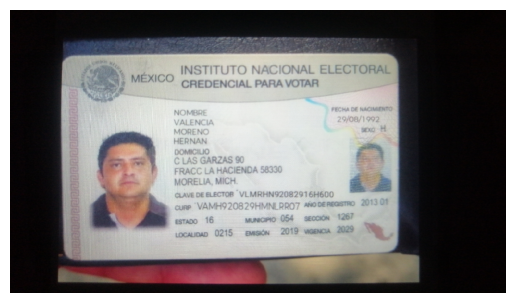

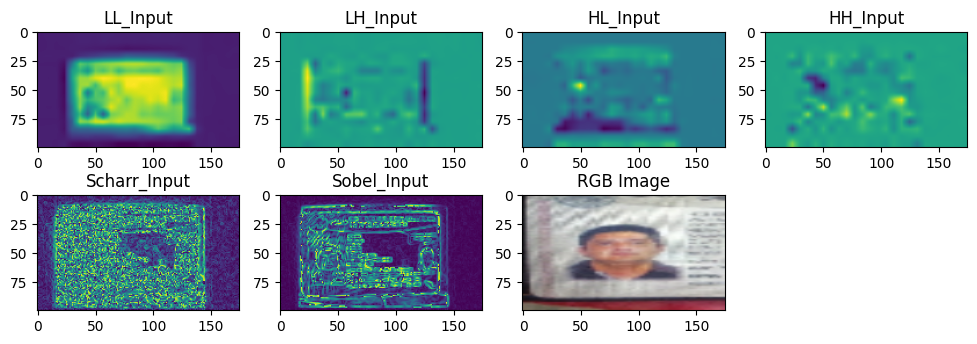

<Figure size 640x480 with 0 Axes>

In [38]:
path = '/Users/jorgecamero/MoireDataset/batch'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
img_elements = preprocess_img(img, height=HEIGHT, width=WIDTH)

prediction_bin, prediction = predict_img(model=model, img=img_elements)
prediction_label = 'Real' if atack_cnt < 2 else 'Ataque'
print(prediction_label)
plt.imshow(load_img(random_img, width=1400, height=800))
plt.title("")
plt.axis('off')

num_cols = 4
num_rows = (len(img_elements) + num_cols - 1) // num_cols

plt.figure(figsize=(12, 2 * num_rows))

for idx, (name, element) in enumerate(list(img_elements.items())[:-3]):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(element)
    plt.axis('on')
    plt.title(name)
    
rgb_channels = list(img_elements.items())[-3:]
rgb_image = np.stack([np.squeeze(element) for _, element in rgb_channels], axis=-1)

plt.imshow(rgb_image.astype(np.uint8))
plt.axis('on')
plt.title('RGB Image')
plt.show()

plt.tight_layout()
plt.show()

In [54]:
import os
import shutil
from collections import defaultdict

root_dir = '/Users/jorgecamero/MoireDataset'
output_dir = os.path.join(root_dir, 'mergeDataset')

Ataque_dirs = [os.path.join(root, dir) for root, dirs, files in os.walk(root_dir) for dir in dirs if dir == "Ataque" and root != output_dir]
print(Ataque_dirs)

Reales_dirs = [os.path.join(root, dir) for root, dirs, files in os.walk(root_dir) for dir in dirs if dir == "Reales" and root != output_dir]
print(Reales_dirs)

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

Ataque_output = os.path.join(output_dir, 'Ataque')
if not os.path.exists(Ataque_output):
    os.mkdir(Ataque_output)
    
Reales_output = os.path.join(output_dir, 'Reales')
if not os.path.exists(Reales_output):
    os.mkdir(Reales_output)

idx = 0
for dir in Ataque_dirs:
    for file in os.listdir(dir):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            file_path = os.path.join(dir, file)
            shutil.copyfile(file_path, os.path.join(Ataque_output, f"Ataque_img_{idx}.jpg"))
            idx += 1

['/Users/jorgecamero/MoireDataset/batch', '/Users/jorgecamero/MoireDataset/Procesados', '/Users/jorgecamero/MoireDataset/batchTrain', '/Users/jorgecamero/MoireDataset/mergeDataset']
['/Users/jorgecamero/MoireDataset/batch/Reales', '/Users/jorgecamero/MoireDataset/Procesados/Reales', '/Users/jorgecamero/MoireDataset/batchTrain/Reales', '/Users/jorgecamero/MoireDataset/mergeDataset/Reales']
